# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print("Median_Household_Income_2015:")
df_data_shape = df_hh_income.shape
r, c = df_data_shape
print(f"shape of data: {df_data_shape}")
print(f"rows: {r}")
print(f"columns: {c}")
print(f"column names: {sorted(df_hh_income)}")
print(f"NaN values: {df_hh_income.isnull().sum().any()}")
print(f"duplicates: {df_hh_income.duplicated().values.any()}")

Median_Household_Income_2015:
shape of data: (29322, 3)
rows: 29322
columns: 3
column names: ['City', 'Geographic Area', 'Median Income']
NaN values: True
duplicates: False


In [7]:
print("Pct_People_Below_Poverty_Level:")
df_data_shape = df_pct_poverty.shape
r, c = df_data_shape
print(f"shape of data: {df_data_shape}")
print(f"rows: {r}")
print(f"columns: {c}")
print(f"column names: {sorted(df_pct_poverty)}")
print(f"NaN values: {df_pct_poverty.isnull().sum().any()}")
print(f"duplicates: {df_pct_poverty.duplicated().values.any()}")

Pct_People_Below_Poverty_Level:
shape of data: (29329, 3)
rows: 29329
columns: 3
column names: ['City', 'Geographic Area', 'poverty_rate']
NaN values: False
duplicates: False


In [8]:
print("Pct_Over_25_Completed_High_School:")
df_data_shape = df_pct_completed_hs.shape
r, c = df_data_shape
print(f"shape of data: {df_data_shape}")
print(f"rows: {r}")
print(f"columns: {c}")
print(f"column names: {sorted(df_pct_completed_hs)}")
print(f"NaN values: {df_pct_completed_hs.isnull().sum().any()}")
print(f"duplicates: {df_pct_completed_hs.duplicated().values.any()}")

Pct_Over_25_Completed_High_School:
shape of data: (29329, 3)
rows: 29329
columns: 3
column names: ['City', 'Geographic Area', 'percent_completed_hs']
NaN values: False
duplicates: False


In [9]:
print("Share_of_Race_By_City:")
df_data_shape = df_share_race_city.shape
r, c = df_data_shape
print(f"shape of data: {df_data_shape}")
print(f"rows: {r}")
print(f"columns: {c}")
print(f"column names: {sorted(df_share_race_city)}")
print(f"NaN values: {df_share_race_city.isnull().sum().any()}")
print(f"duplicates: {df_share_race_city.duplicated().values.any()}")

Share_of_Race_By_City:
shape of data: (29268, 7)
rows: 29268
columns: 7
column names: ['City', 'Geographic area', 'share_asian', 'share_black', 'share_hispanic', 'share_native_american', 'share_white']
NaN values: False
duplicates: False


In [10]:
print("Deaths_by_Police_US:")
df_data_shape = df_fatalities.shape
r, c = df_data_shape
print(f"shape of data: {df_data_shape}")
print(f"rows: {r}")
print(f"columns: {c}")
print(f"column names: {sorted(df_fatalities)}")
print(f"NaN values: {df_fatalities.isnull().sum().any()}")
print(f"duplicates: {df_fatalities.duplicated().values.any()}")

Deaths_by_Police_US:
shape of data: (2535, 14)
rows: 2535
columns: 14
column names: ['age', 'armed', 'body_camera', 'city', 'date', 'flee', 'gender', 'id', 'manner_of_death', 'name', 'race', 'signs_of_mental_illness', 'state', 'threat_level']
NaN values: True
duplicates: False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [15]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].apply(lambda x:str(x).replace('-','0')).astype('float64')
pct_poverty_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)
pct_poverty_by_state.head()

,poverty_rate
Geographic Area,
MS,26.88
AZ,25.27
GA,23.66
AR,22.96
NM,22.51


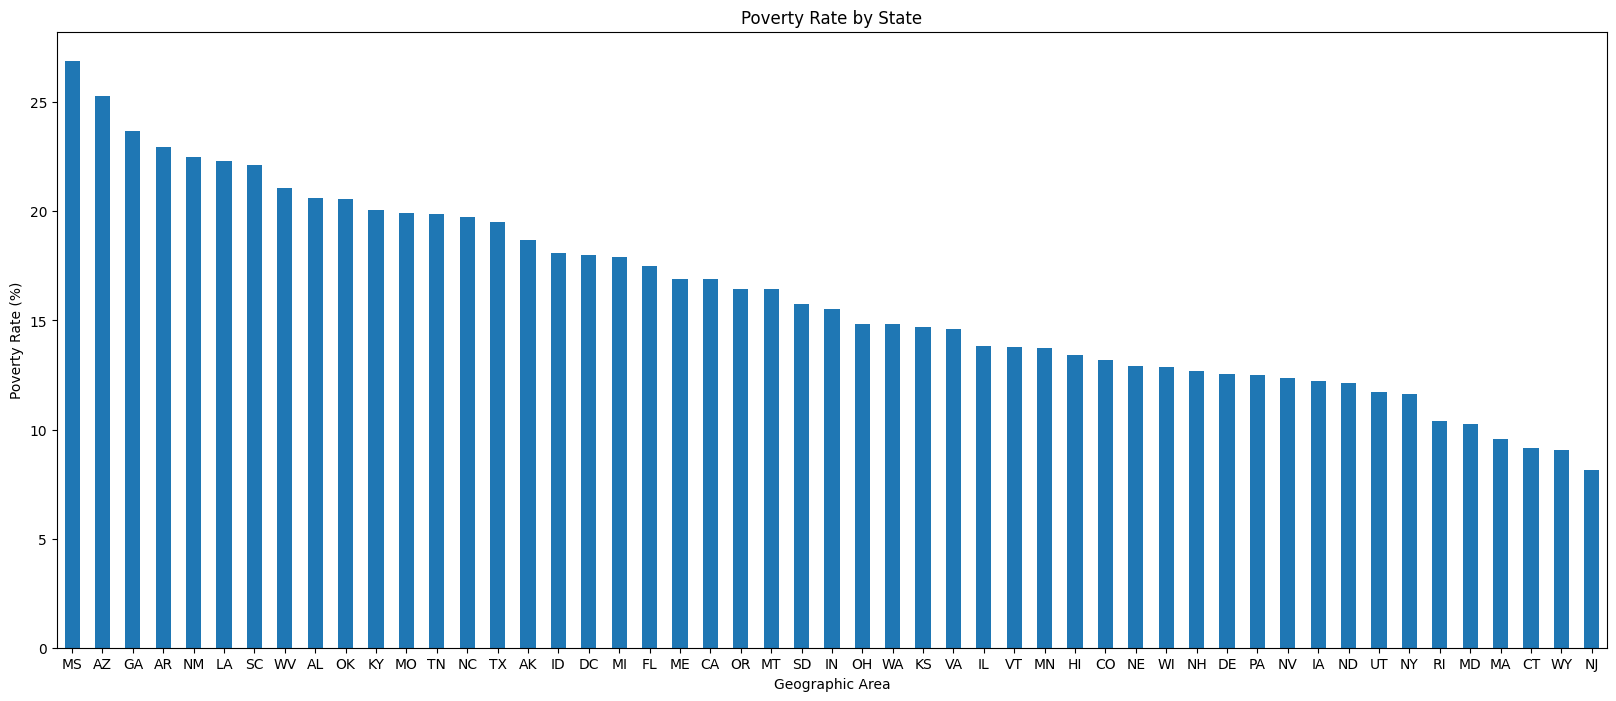

In [16]:
pct_poverty_by_state.plot(
    kind='bar',
    figsize=(20,8),
    title = 'Poverty Rate by State',
    rot=0
)

plt.ylabel('Poverty Rate (%)')
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [19]:
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].apply(lambda x:str(x).replace('-','0')).astype('float64')
pct_hs_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values()
pct_hs_by_state.head()

,percent_completed_hs
Geographic Area,
TX,74.09
MS,78.47
GA,78.63
NM,78.97
LA,79.12


In [24]:
print(f'lowest: {pct_hs_by_state.idxmin()}')
print(f'highest: {pct_hs_by_state.idxmax()}')

lowest: TX
highest: MA


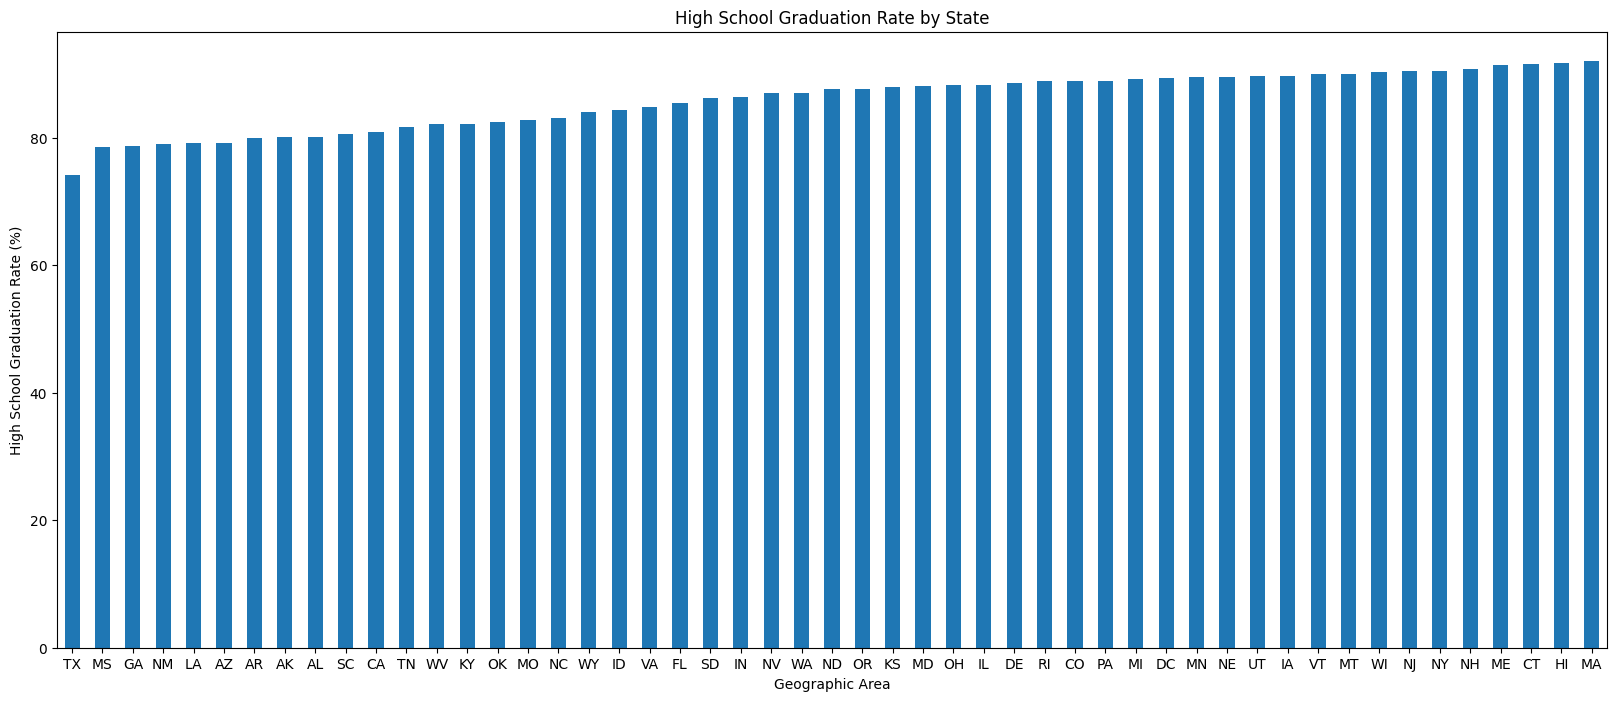

In [20]:
pct_hs_by_state.plot(
    kind='bar',
    figsize=(20,8),
    title = 'High School Graduation Rate by State',
    rot=0
)

plt.ylabel('High School Graduation Rate (%)')
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [25]:
pct_hs_by_state.sort_index(inplace=True)
pct_poverty_by_state.sort_index(inplace=True)
pct_hs_by_state.index==pct_poverty_by_state.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

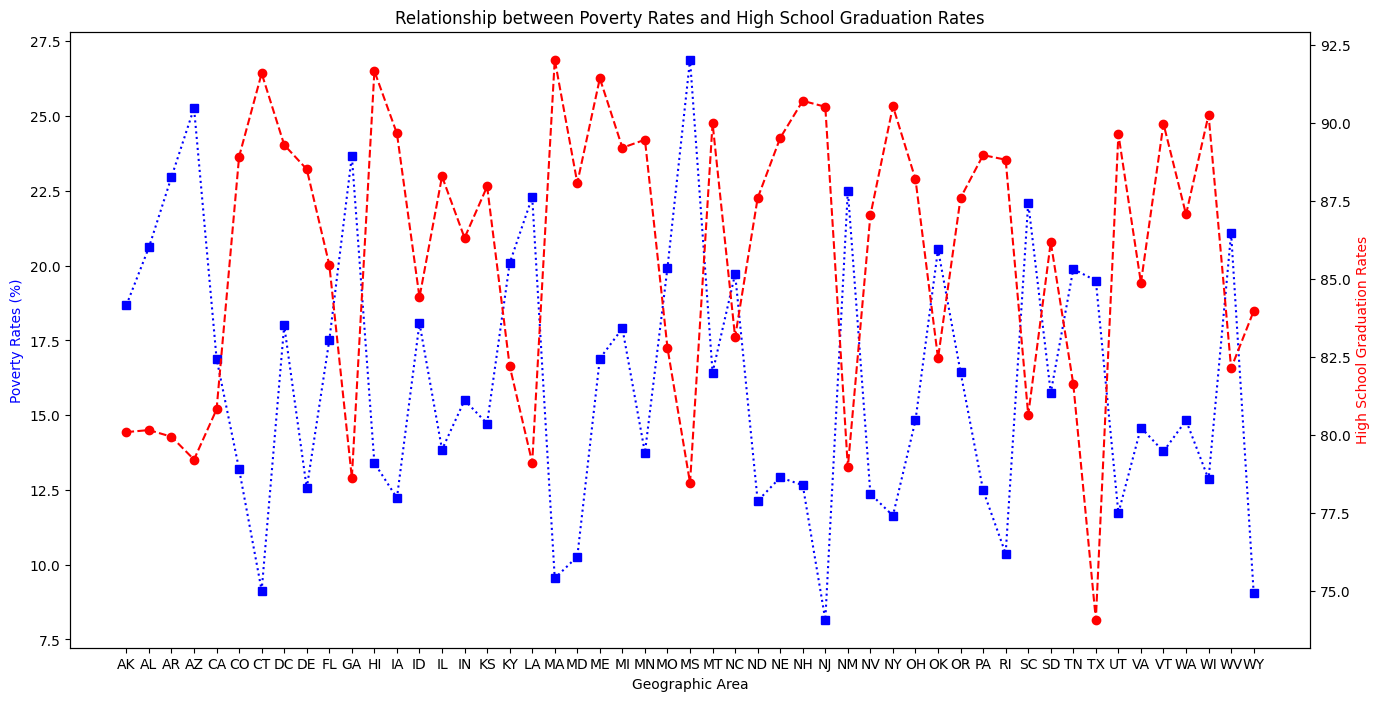

In [26]:
plt.figure(figsize=(16,8), dpi=100)
plt.title('Relationship between Poverty Rates and High School Graduation Rates')

poverty_axis = plt.gca()
hs_grad_axis = poverty_axis.twinx()

poverty_axis.set_xlabel('Geographic Area')
poverty_axis.set_ylabel('Poverty Rates (%)', color='blue')
hs_grad_axis.set_ylabel('High School Graduation Rates', color='red')

poverty_axis.plot(pct_poverty_by_state.index, pct_poverty_by_state, color='blue', linestyle='dotted', marker='s')
hs_grad_axis.plot(pct_hs_by_state.index, pct_hs_by_state, color='red', linestyle='dashed', marker='o')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [27]:
poverty_hs_comparison = pd.concat([pct_hs_by_state, pct_poverty_by_state], axis=1)
poverty_hs_comparison

,percent_completed_hs,poverty_rate
Geographic Area,,
AK,80.10,18.68
AL,80.16,20.61
AR,79.95,22.96
AZ,79.22,25.27
CA,80.82,16.89
CO,88.93,13.19
CT,91.59,9.14
DC,89.30,18.00
DE,88.52,12.56


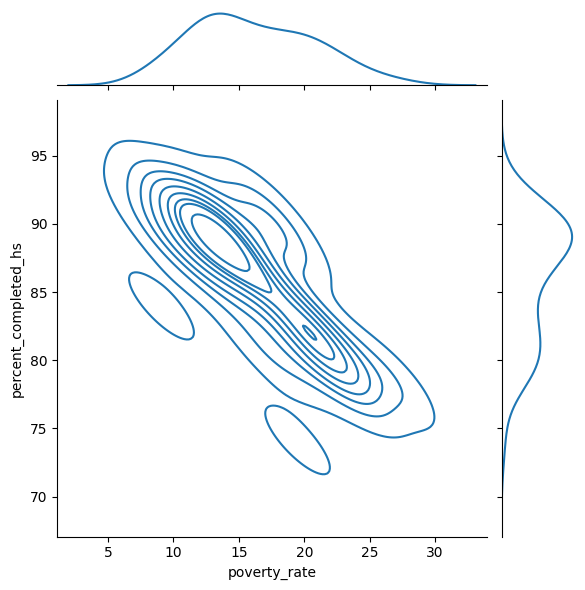

In [28]:
sns.jointplot(
    data = poverty_hs_comparison,
    y='percent_completed_hs',
    x='poverty_rate',
    kind='kde',
)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

<Axes: xlabel='percent_completed_hs', ylabel='poverty_rate'>

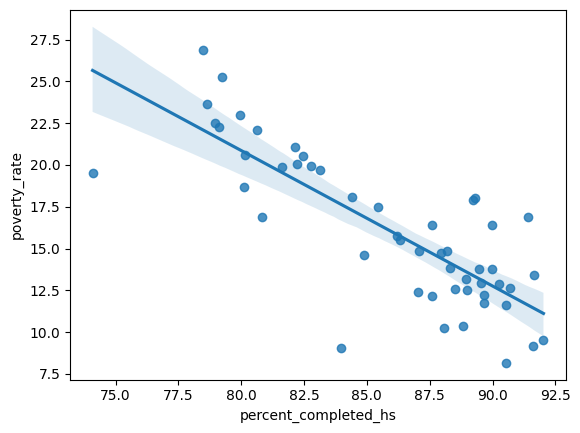

In [29]:
sns.regplot(
    data = poverty_hs_comparison,
    y='poverty_rate',
    x='percent_completed_hs',
)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [31]:
df_share_race_city['share_asian'] = df_share_race_city['share_asian'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_black'] = df_share_race_city['share_black'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_white'] = df_share_race_city['share_white'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')

race_by_state = df_share_race_city.groupby('Geographic area')[['share_white', 'share_black', 'share_asian', 'share_hispanic', 'share_native_american']].mean()
race_by_state

,share_white,share_black,share_asian,share_hispanic,share_native_american
Geographic area,,,,,
AK,45.26,0.56,1.38,2.13,45.48
AL,72.51,23.32,0.48,2.98,0.66
AR,78.45,16.30,0.48,4.27,0.76
AZ,59.93,0.95,0.73,20.14,28.59
CA,71.54,2.68,5.54,29.51,1.72
CO,87.77,0.92,1.15,17.90,1.62
CT,86.11,4.99,2.99,7.98,0.66
DC,38.50,50.70,3.50,9.10,0.30
DE,76.25,15.39,2.00,7.42,0.52


In [32]:
sum_per_state = race_by_state['share_asian'] + race_by_state['share_black'] + race_by_state['share_hispanic'] + race_by_state['share_native_american'] + race_by_state['share_white']
race_by_state['share_asian'] = race_by_state['share_asian'] / sum_per_state * 100
race_by_state['share_black'] = race_by_state['share_black'] / sum_per_state * 100
race_by_state['share_hispanic'] = race_by_state['share_hispanic'] / sum_per_state * 100
race_by_state['share_native_american'] = race_by_state['share_native_american'] / sum_per_state * 100
race_by_state['share_white'] = race_by_state['share_white'] / sum_per_state * 100

<Axes: title={'center': 'Share of Race by State'}, xlabel='Geographic area'>

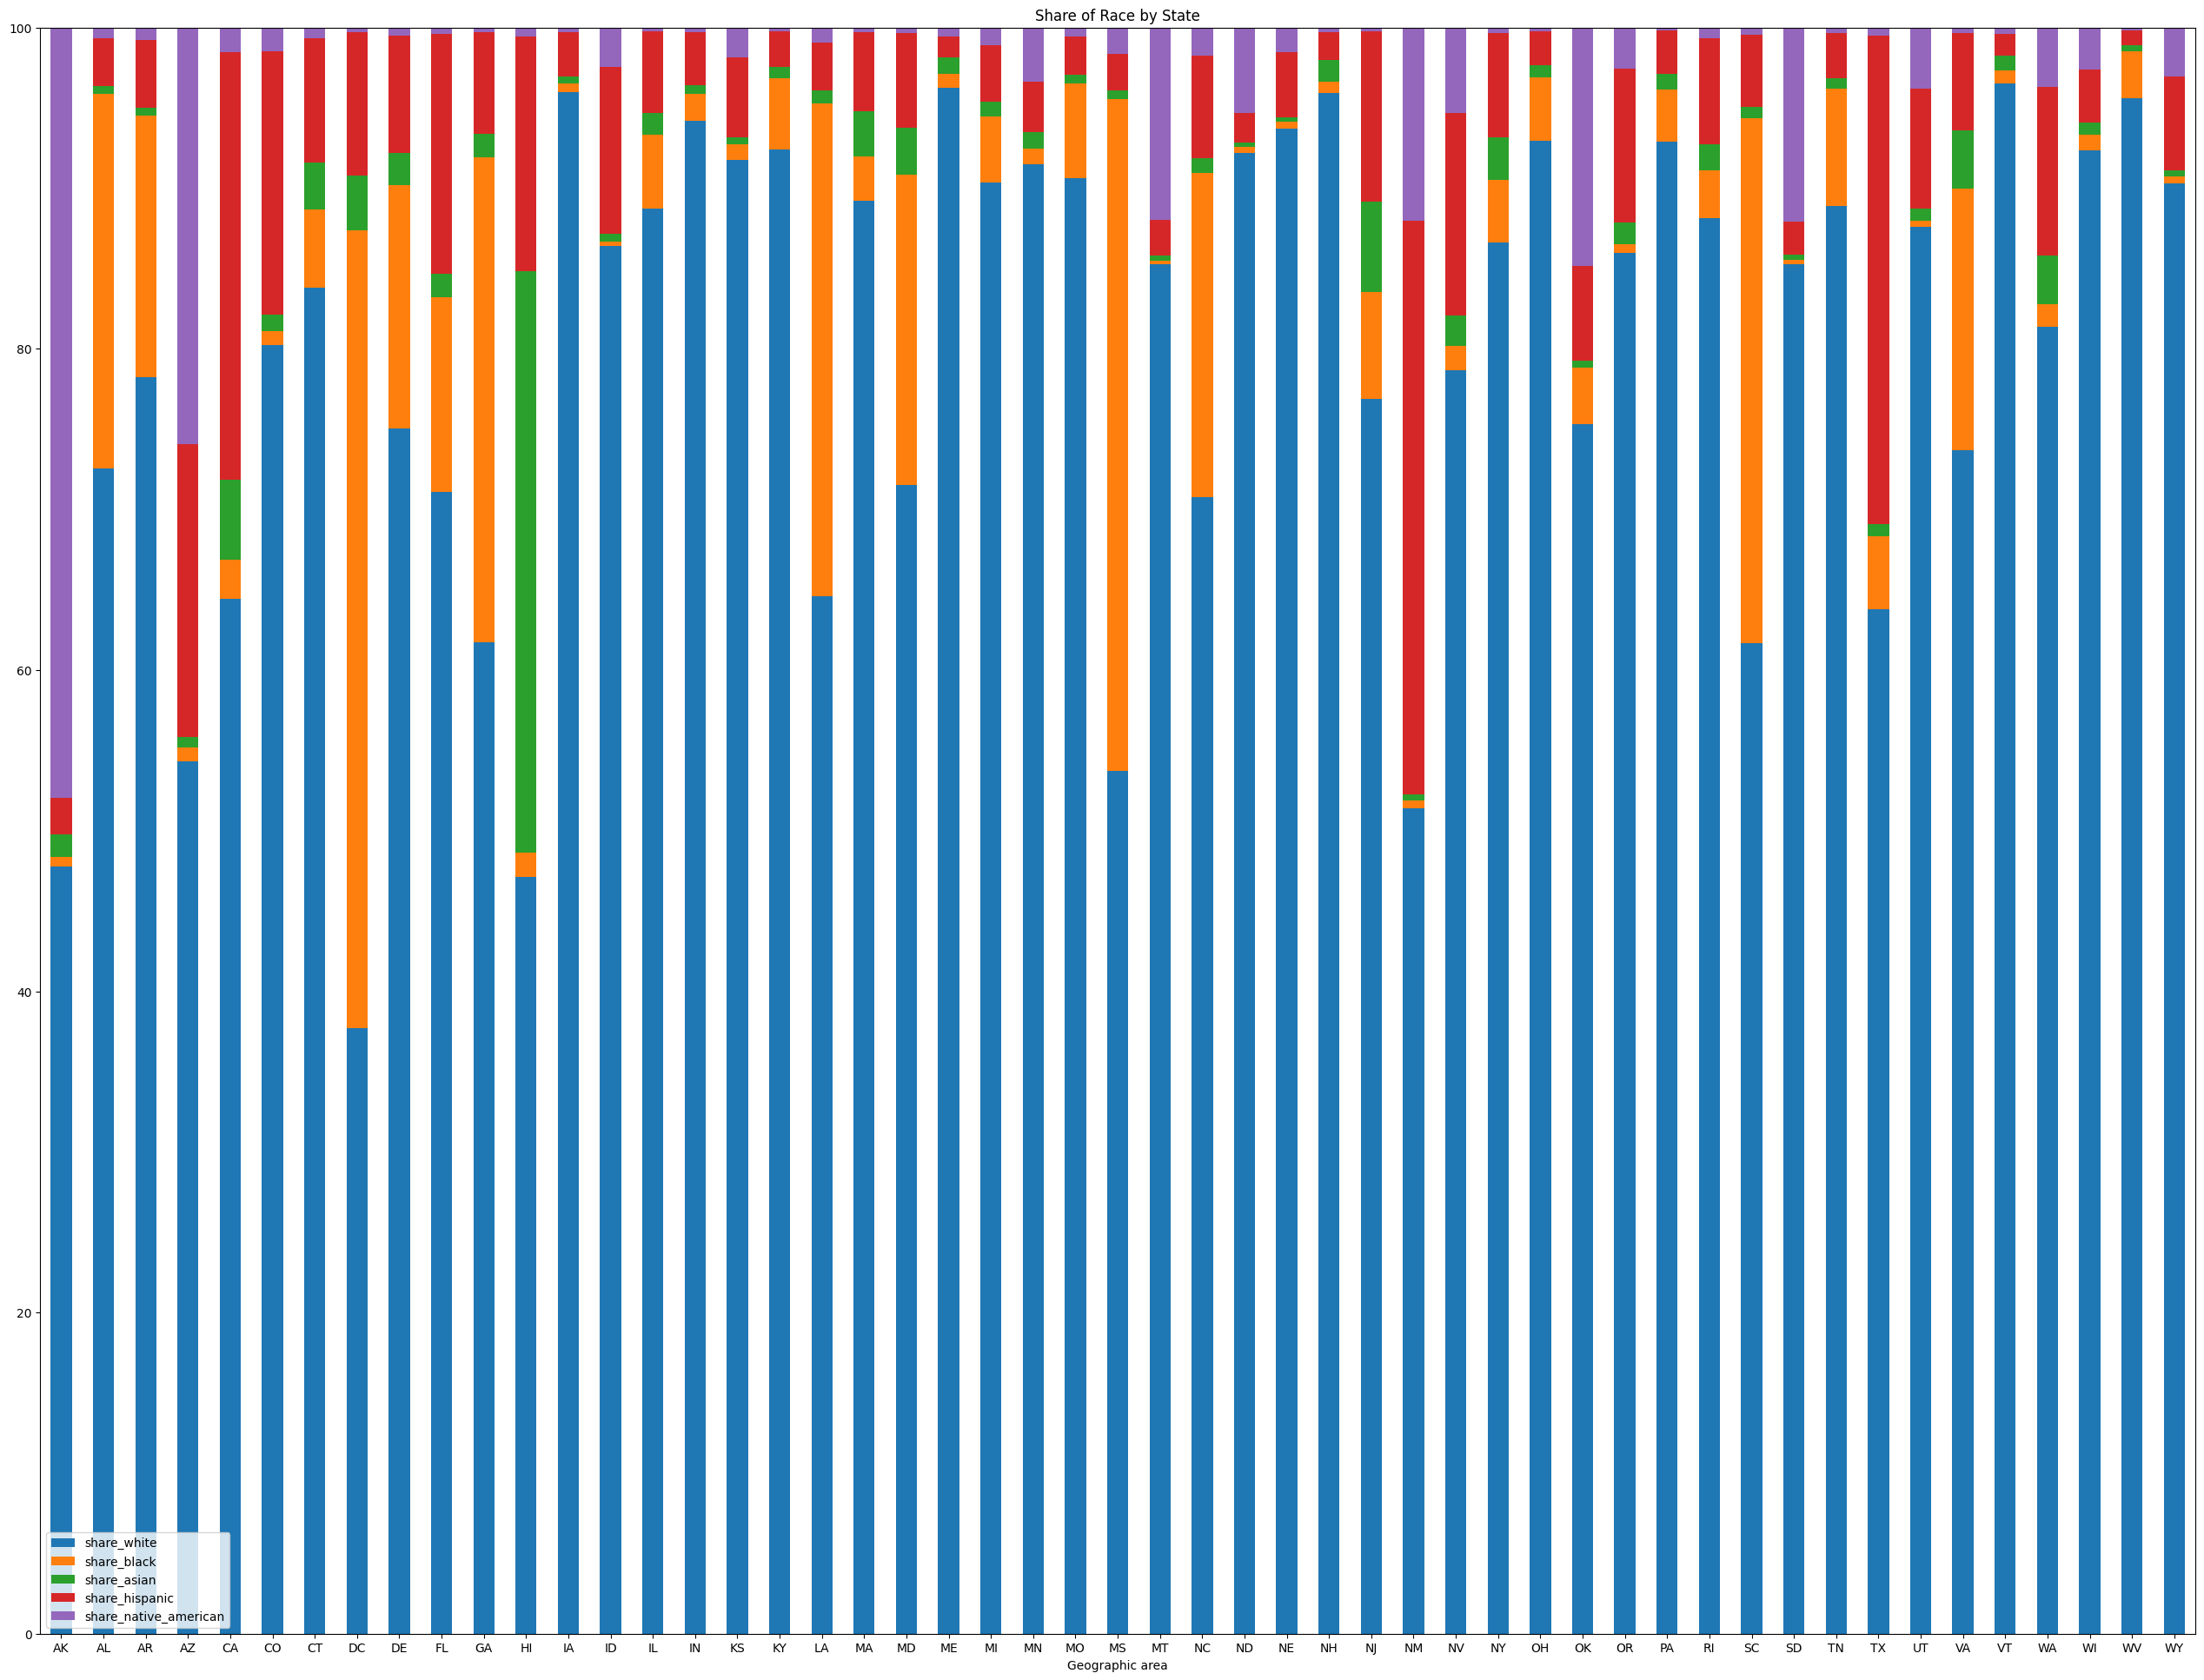

In [33]:
race_by_state.plot(
    kind='bar',
    figsize = (32,24),
    title = 'Share of Race by State',
    rot=0,
    stacked=True,
    ylim=(0,100),
)

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [34]:
victims_by_race = df_fatalities['race'].value_counts().rename({'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native American','O':'Others'})
victims_by_race

,count
race,
White,1201
Black,618
Hispanic,423
Asian,39
Native American,31
Others,28


In [35]:
px.pie(
    names = victims_by_race.index,
    values = victims_by_race,
    title = 'Victims by Race',
    hole = 0.4
)

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [36]:
victims_by_sex = df_fatalities['gender'].value_counts().rename({'M':'Male','F':'Female'})
victims_by_sex

,count
gender,
Male,2428
Female,107


In [37]:
px.pie(
    values = victims_by_sex,
    names = victims_by_sex.index,
    title = 'Victims by Sex'
)

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [38]:
px.box(
    df_fatalities[df_fatalities['gender']=='M'],
    x='manner_of_death',
    y='age',
    color='manner_of_death',
    title = 'Age and Manner of Death (Male)'
)

In [39]:
px.box(
    df_fatalities[df_fatalities['gender']=='F'],
    x='manner_of_death',
    y='age',
    color='manner_of_death',
    title = 'Age and Manner of Death (Female)'
)

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [40]:
armed_status = df_fatalities['armed'].value_counts()
armed_status

,count
armed,
gun,1398
knife,373
vehicle,177
unarmed,171
undetermined,117
...,...
hand torch,1
garden tool,1
pole,1


<Axes: title={'center': 'Top 10 Victims armed status'}, xlabel='armed'>

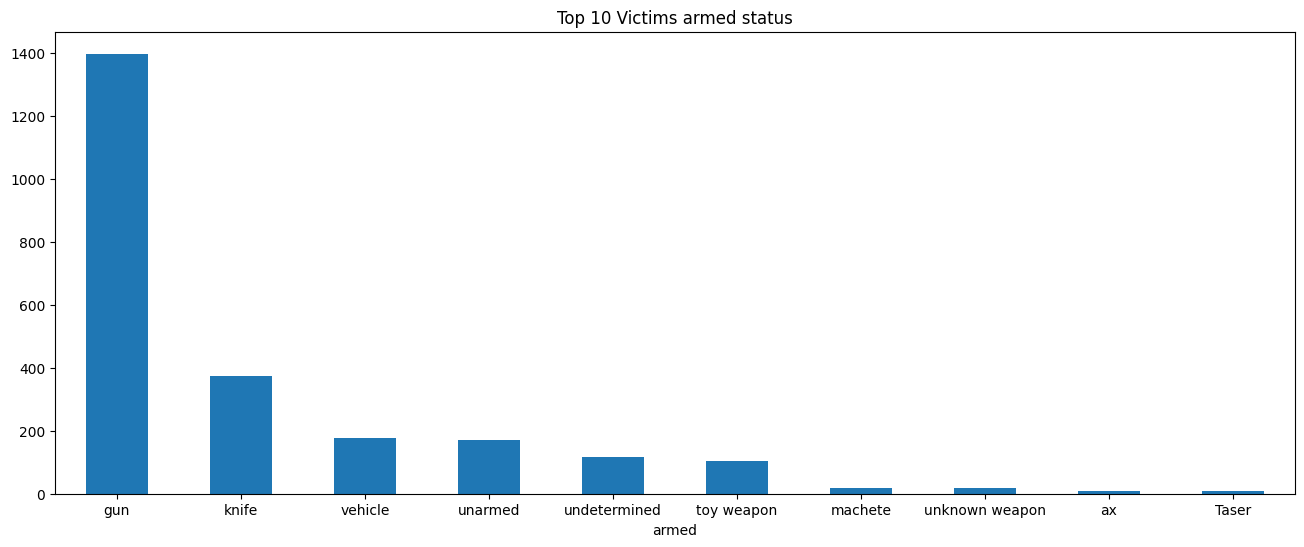

In [41]:
armed_status[:10].plot(
    kind='bar',
    figsize = (16,6),
    title = 'Top 10 Victims armed status',
    rot=0,
)

In [42]:
armed_vs_unarmed = pd.Series({
    'armed':len(df_fatalities[df_fatalities['armed']!='unarmed']),
    'unarmed':len(df_fatalities[df_fatalities['armed']=='unarmed'])
})
armed_vs_unarmed

,0
armed,2364
unarmed,171


In [43]:
px.pie(
    names = armed_vs_unarmed.index,
    values = armed_vs_unarmed.values,
    title = 'Armed vs Unarmed Percentage'
)

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [44]:
under_25 = len(df_fatalities[df_fatalities['age']<25])/len(df_fatalities)*100
print(f'{under_25:.2f}% of police killing victims are under the age of 25')

17.75% of police killing victims are under the age of 25


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

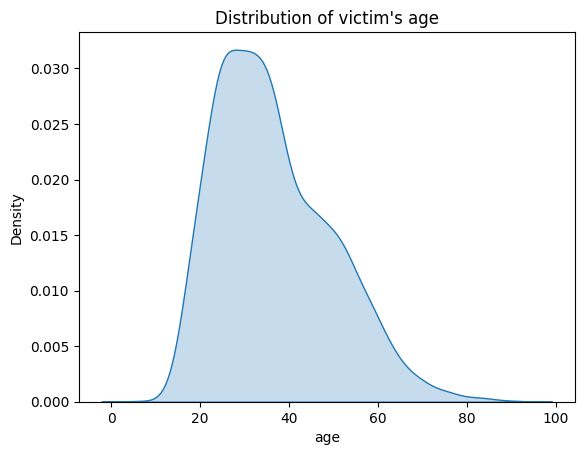

In [45]:
plt.title("Distribution of victim's age")
sns.kdeplot(data=df_fatalities, x='age', fill=True)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

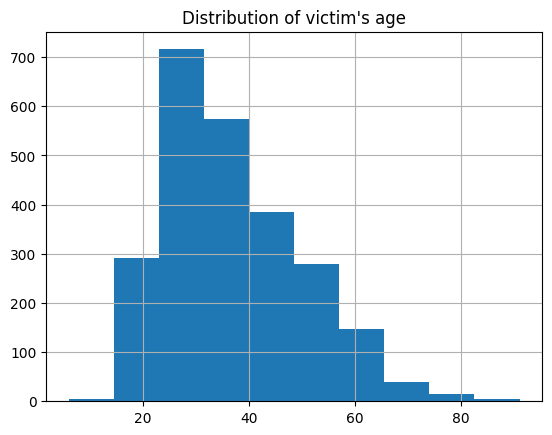

In [46]:
plt.title("Distribution of victim's age")
df_fatalities['age'].hist()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

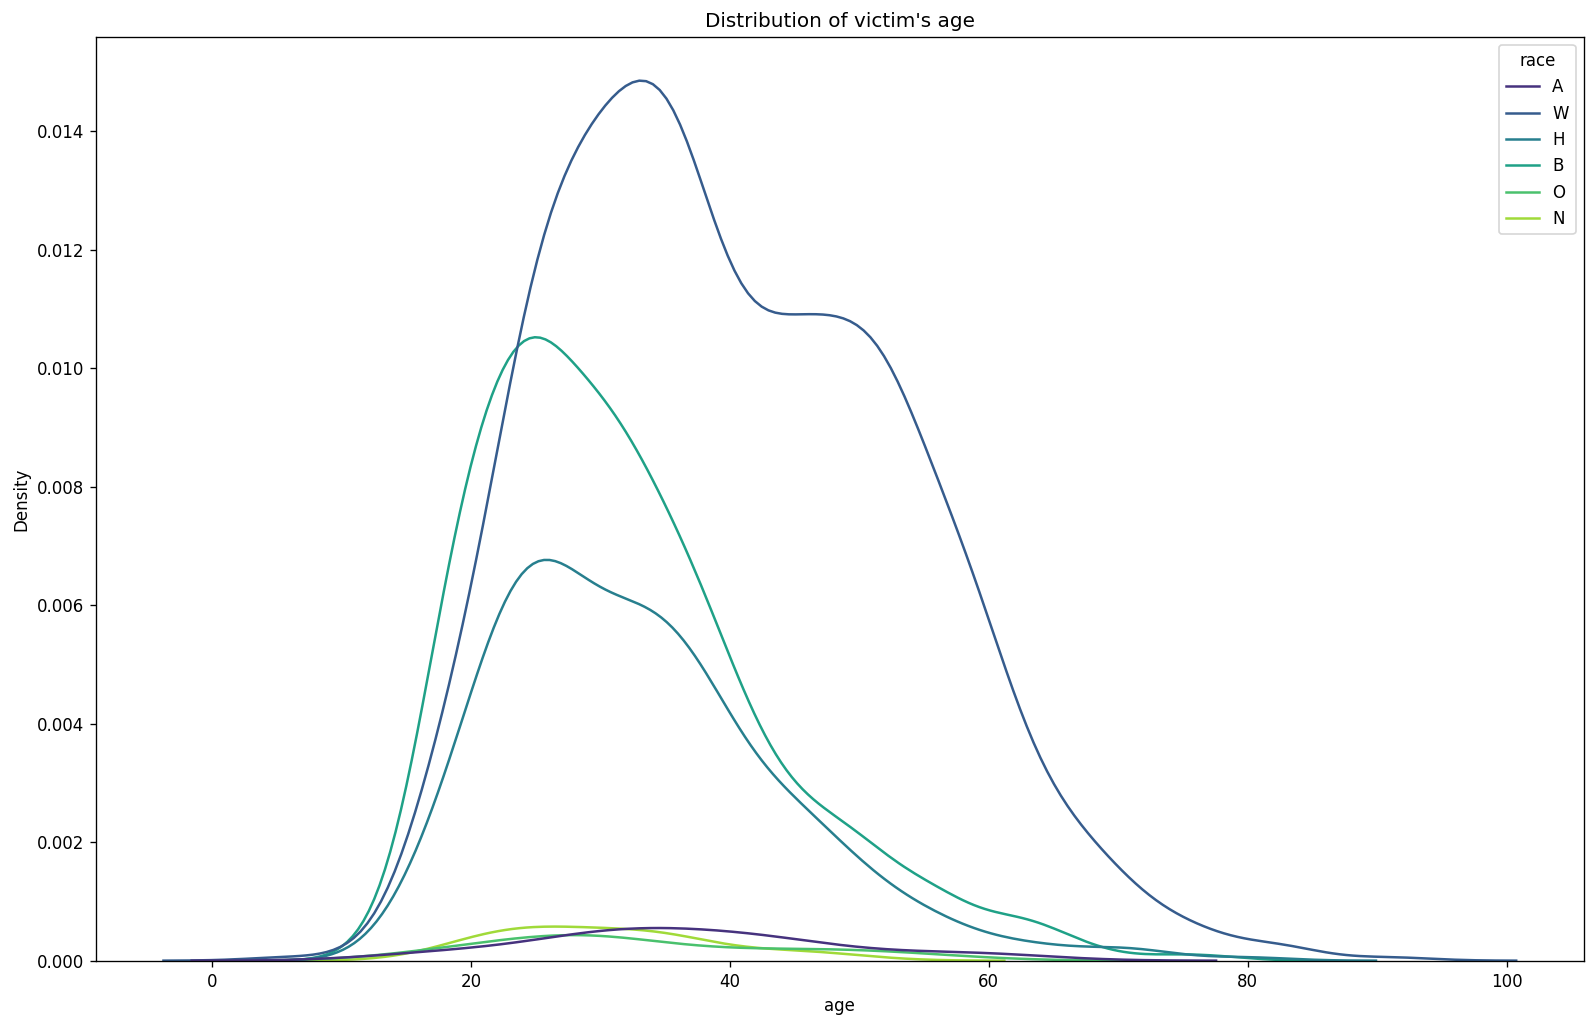

In [47]:
plt.figure(figsize=(16,10), dpi=120)
plt.title("Distribution of victim's age")
sns.kdeplot(
    data=df_fatalities.rename({'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native American','O':'Others'}),
    x='age',
    hue='race',
    palette='viridis'
)
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [48]:
fatalities_by_mental_illness = df_fatalities['signs_of_mental_illness'].value_counts()


In [49]:
px.pie(
    title = 'Relationship between Police Killing Victims and Mental Illness',
    names = fatalities_by_mental_illness.index,
    values = fatalities_by_mental_illness.values,
)

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [50]:
top_10_cities = df_fatalities['city'].value_counts().sort_values(ascending=False)[:10]
top_10_cities

,count
city,
Los Angeles,39
Phoenix,31
Houston,27
Chicago,25
Las Vegas,21
San Antonio,20
Columbus,19
Austin,18
Miami,18


<Axes: title={'center': 'Top 10 Cities with the most police killings'}, xlabel='city'>

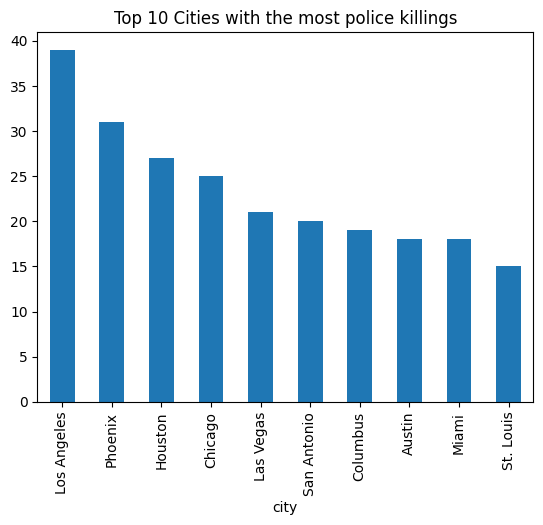

In [51]:
plt.title('Top 10 Cities with the most police killings')
top_10_cities.plot(kind='bar')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [52]:
top_10_cities_by_race = df_fatalities[df_fatalities['city'].isin(top_10_cities.index.tolist())].groupby(['city','race'])['name'].count().unstack(level=1)
top_10_cities_by_race.fillna(0, inplace=True)
top_10_cities_by_race.rename({'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native American','O':'Others'},axis=1, inplace=True)
top_10_cities_by_race

race,Asian,Black,Hispanic,Native American,Others,White
city,,,,,,
Austin,0.00,3.00,2.00,0.00,0.00,13.00
Chicago,0.00,21.00,1.00,0.00,0.00,2.00
Columbus,0.00,11.00,0.00,0.00,1.00,6.00
Houston,1.00,15.00,6.00,1.00,0.00,3.00
Las Vegas,0.00,3.00,5.00,0.00,0.00,9.00
Los Angeles,1.00,10.00,19.00,0.00,0.00,6.00
Miami,0.00,8.00,6.00,0.00,0.00,3.00
Phoenix,0.00,2.00,11.00,3.00,0.00,12.00
San Antonio,0.00,3.00,12.00,0.00,0.00,3.00


<Axes: title={'center': 'Rate of Death by Race on Top 10 Cities'}, xlabel='city'>

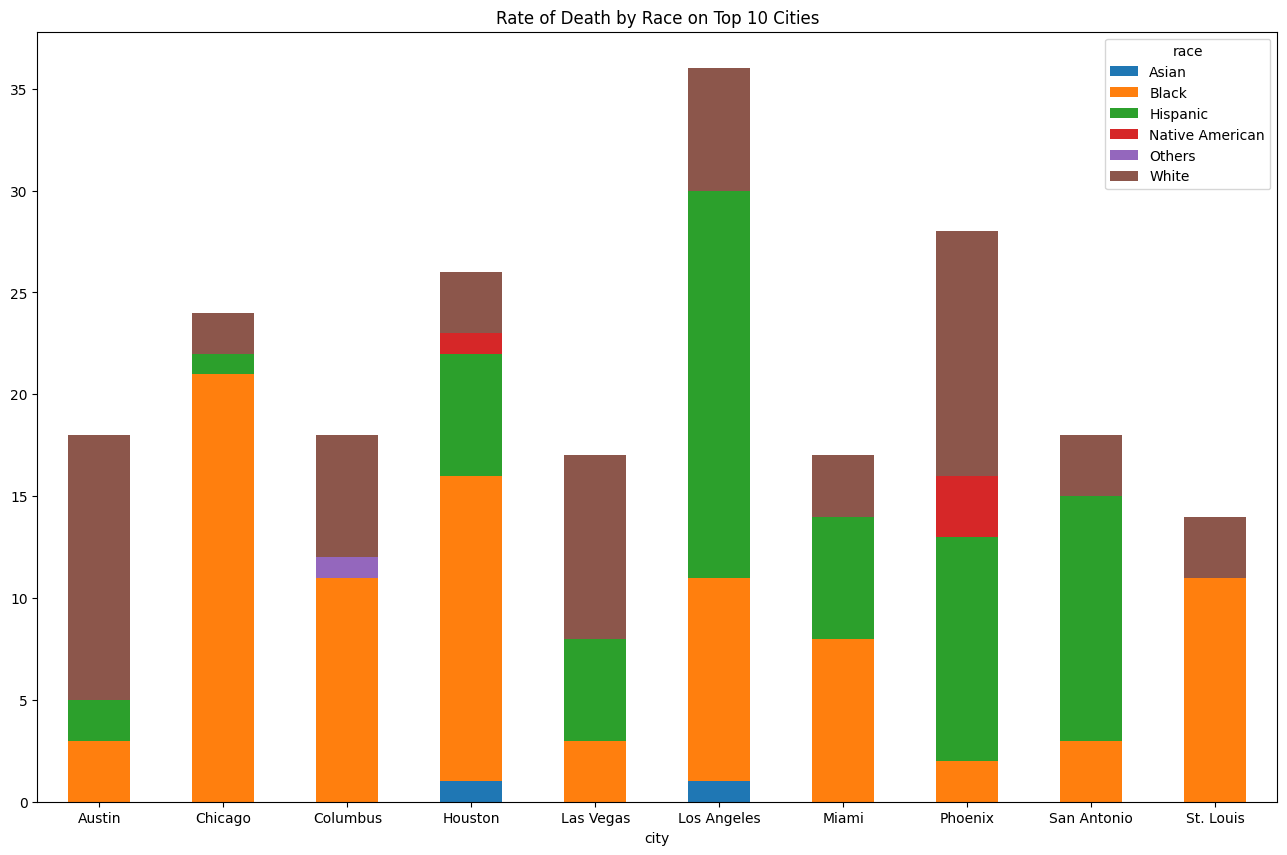

In [53]:
top_10_cities_by_race.plot(
    kind='bar',
    stacked=True,
    figsize=(16,10),
    title='Rate of Death by Race on Top 10 Cities',
    rot=0
)

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [54]:
death_by_state = df_fatalities['state'].value_counts().sort_index()


In [55]:
px.choropleth(
    data_frame = death_by_state,
    locations = death_by_state.index,
    color = death_by_state.values,
    locationmode="USA-states",
    scope='usa',
    title = 'Police Killings b'
)

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [56]:
fatality_by_date = df_fatalities['date'].value_counts().sort_index()
fatality_by_date

,count
date,
01/01/16,1
01/01/17,6
01/02/16,2
01/02/17,2
01/03/15,3
...,...
31/08/16,2
31/10/15,2
31/10/16,3


<Axes: title={'center': 'Number of Police Killings over time'}, xlabel='date'>

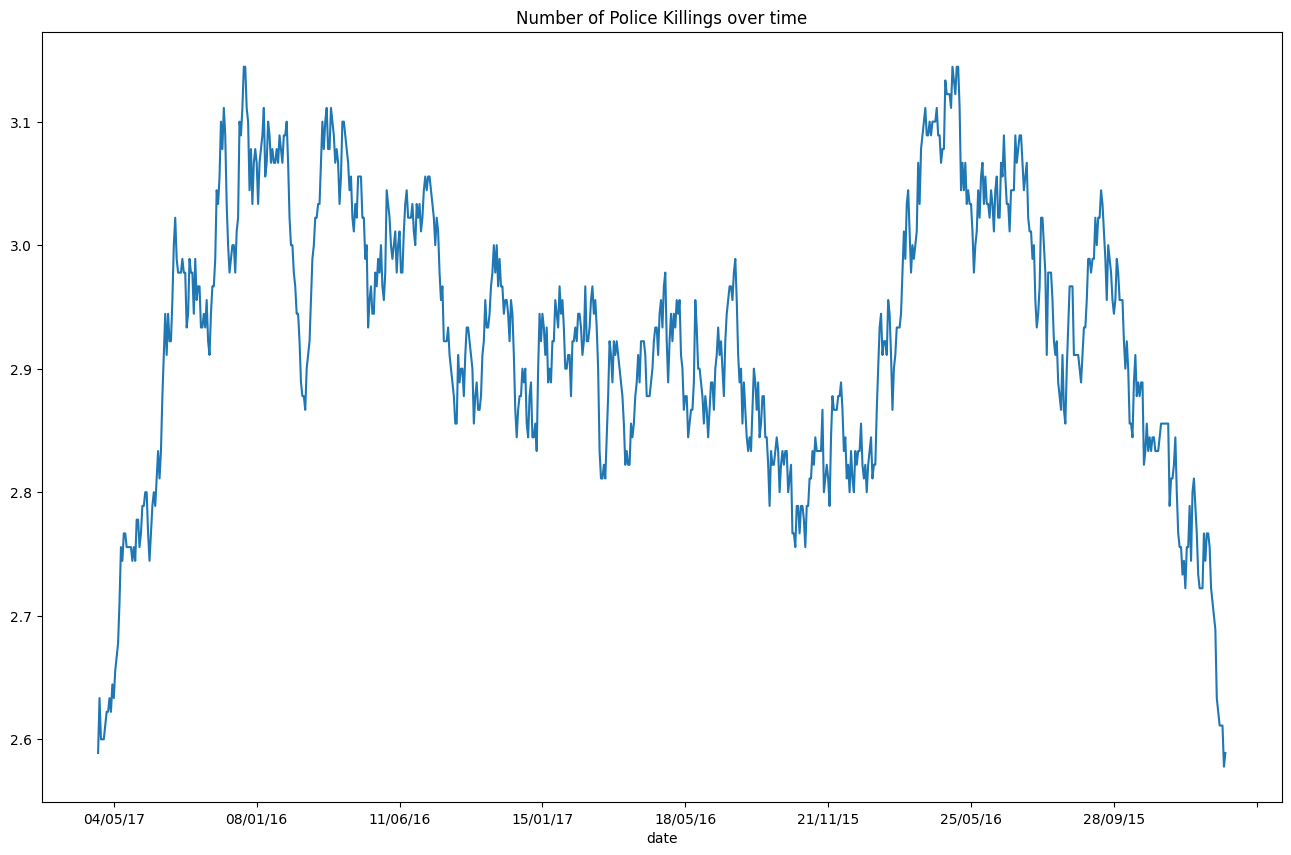

In [57]:
fatality_by_date.rolling(90).mean().plot(
    title='Number of Police Killings over time',
    figsize = (16,10)
)

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).